In [20]:
import numpy as np
from numpy import linalg as ll
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [21]:
def loaddata(fname):
    data = np.loadtxt(fname,skiprows=1, delimiter=',')
    y = data[:,0]
    X = data[:,1:]
    nm = np.sqrt(np.sum(X * X, axis=1))
    X = X / nm[:,None]
    return y, X
trainY, trainX = loaddata('E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw3-data\\validation.csv')
testY, testX = loaddata('E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw3-data\\test.csv')

###Initialization

In [22]:
#Get # of training data and # of features
N = len(trainX)
d = len(trainX[0,:])
print "The dimension of the trainX is: ", N,d

#Constants assignment
pass_num = 50
eta = 0.1
C = 100

#initialize w and w0
w = np.zeros(d)
w0 = 0

#Convert into Matrix format
trainX = np.matrix(trainX)
#trainY = np.matrix(trainY)
testX = np.matrix(testX)
#testY = np.matrix(testY)
#w = np.matrix(w)

The dimension of the trainX is:  1000 784


###Pseudo codes
x_t and y_t should be real training data

w1 <- 0

for t = 1 to T do (for each iteration, we use 1 record)

    Get x_t ∈ Rd
    
    Predict sgn(wt · xt + w0)
    
    Get y_t ∈ {−1, +1}
    
    if y_t(wt · xt + w0) < 1 then
        w0^(t+1) ← w0^(t)+ηy_t
    
        w^(t+1) ← w^(t) -η(2/NC w^(t)-y_tx_t)
        
    else
        w0^(t+1) ← w0^(t)
        w^(t+1) ← w^(t)
        
    end if
    
end for


In [23]:
loss_ar = []
#loss_each = []
for p in range(0,pass_num):
    loss = 0
    for t in range(0,N):
        y_hat = w*trainX[t,:].T + w0
        loss_t = 1-trainY[t]*y_hat
        if loss_t > 0:
            w0 = w0 + eta*trainY[t]
            w = w - eta*(2/float(N*C)*w-trainY[t]*trainX[t,:])
            loss += float(loss_t)
    loss_ar.append(loss / float(N))

In [24]:
def plotting(x_axis,y_axis):

    matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
    fig, ax = plt.subplots()
    ax.plot(x_axis, y_axis, color="green")
    ax.set_xlabel('Pass')
    ax.set_ylabel('Loss')

In [25]:
len(range(1,len(loss_ar)+1))

50

In [26]:
loss_ar

[0.4444902553497879,
 0.22461695399760484,
 0.18162402809098446,
 0.1573839955231453,
 0.141474242158781,
 0.1332220873943911,
 0.12383884028102066,
 0.1161303090840033,
 0.1114113004600173,
 0.10699854066707996,
 0.1018295624012128,
 0.09827318247318186,
 0.09483382200880529,
 0.09207370808222762,
 0.0887230858627941,
 0.08631099280248343,
 0.08488613338682198,
 0.0812243684931226,
 0.07778486799718196,
 0.07716153171979194,
 0.07550419218999965,
 0.07250681776568099,
 0.07225262821073489,
 0.07035377768063251,
 0.0692709988988264,
 0.06668859672339952,
 0.06704928362301811,
 0.06535219655019057,
 0.06445200361921424,
 0.06437448298690751,
 0.0625824521875311,
 0.060694237918009,
 0.06089208392140188,
 0.05921100032944699,
 0.05874716911793118,
 0.05715882383501392,
 0.0561351455670063,
 0.055929403546813104,
 0.05424222872398378,
 0.05400314715899426,
 0.05253336280591995,
 0.05145102740291777,
 0.05010585337161406,
 0.05057185001648219,
 0.04932374774796632,
 0.04902134839413169,
 0

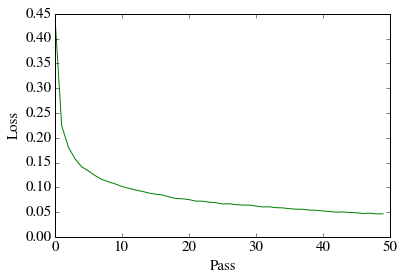

In [27]:
plotting(range(len(loss_ar)),loss_ar)

### Prediction

In [28]:
N_test = len(testY)
trainMistake = 0
testMistake = 0
for i in range(N):
    trainY_hat = 1 if (w*trainX[i,:].T + w0) > 0 else -1
    if trainY_hat != trainY[i]:
        trainMistake += 1
#prediction = []
for i in range(N_test):
    testY_hat = 1 if (w*testX[i,:].T + w0) > 0 else -1
    if testY_hat != testY[i]:
        testMistake += 1
    #prediction.append(testY_hat)
print trainMistake, testMistake

13 62


In [29]:
print ll.norm(w)

27.3592710735
